In [1]:
%matplotlib inline
import numpy as np
import numpy.random
import scipy as sp
from scipy import special
import matplotlib.pyplot as plt
import pprint

from const import *
from link.python.link_base import *
from pointing.python.point_base import *

from PPM.python.ppm_base import *

In [2]:
link_specs = dict(P_TX = 5,
                eta_TX = 1,
                eta_RX = 1,
                A_TX = (.01/2)**2*np.pi,
                A_RX = (.01/2)**2*np.pi,
                z = 1e9,
                lamb = 650e-9,
                L_point = 0,
                L_pol = 0,
                L_atm = 0)

E_photon = calc_E_photon(link_specs['lamb'])

P_RX = calc_rx_power(**link_specs)

print("Received Power:\t\t {:.2e} W".format(P_RX))

photons_per_sec = P_RX/E_photon
print("Photons per second:\t {:.2e}".format(photons_per_sec))

Received Power:		 7.30e-14 W
Photons per second:	 2.40e+05


In [3]:
P_Vega = 12.57e-15
print("Vega Photons @ {}nm: {:.2e}".format(link_specs['lamb']*1e9, P_Vega/E_photon))

TX_terms = (link_specs['A_RX']*link_specs['eta_RX']/(link_specs['lamb']*link_specs['z']))**2
print("P_TX to Match Vega: {:.2e} W".format(P_Vega/TX_terms))

Vega Photons @ 650.0nm: 4.13e+04
P_TX to Match Vega: 8.61e-01 W


<h2>Channel Capacity</h2>

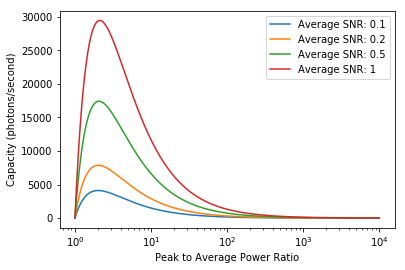

In [4]:
M = np.logspace(0,4,1000)
rho = [.1, .2, .5, 1]

plt.figure()
for SNR in rho:
    capacity = np.log2(np.exp(1)) * photons_per_sec/M * ( (1+1/SNR)*np.log(1+SNR) - (1+M/SNR)*np.log(1+SNR/M))
    plt.semilogx(M, capacity,label='Average SNR: {}'.format(SNR))

plt.ylabel("Capacity (photons/second)")
plt.xlabel("Peak to Average Power Ratio")
plt.legend()
# print("Direct detection RX capacity:\t {:.2e} photons/sec".format(capacity))

<h2>TX Pointing Error</h2>

In [5]:
tx_point_specs = dict(
    M = 1,
    lamb = 650e-9,
    n = 1,
    w_0 = 5e-3)

theta_e2 = calc_theta_e2(**tx_point_specs)
print("1/e**2 Half Angle:\t {:.2e} radians".format(theta_e2))

1/e**2 Half Angle:	 4.14e-05 radians


Standard Deviation Range: 2.07e+04 to 2.07e+04 rad


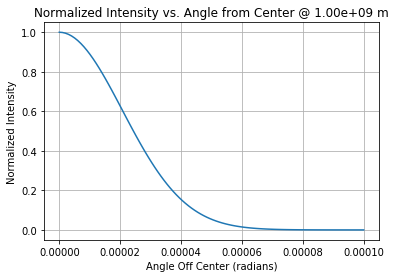

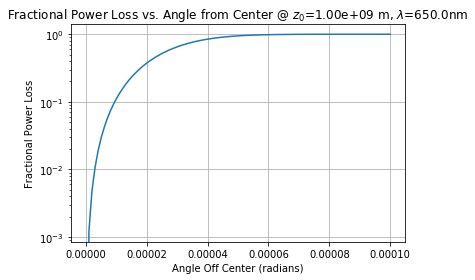

In [6]:
z = 1e9
M = tx_point_specs['M']
lamb = tx_point_specs['lamb']
n = tx_point_specs['n']
w_0 = tx_point_specs['w_0']

theta = np.linspace(0,1e-4,100)
intensity = np.array([intensity_theta(x, z, 0, M, lamb, n, w_0) for x in theta])
sigma = np.array([calc_sigma(x, M, lamb, n, w_0) for x in z*np.cos(theta)])
intensity_norm = intensity*np.sqrt(2*np.pi*np.power(sigma, 2))

print("Standard Deviation Range: {:.2e} to {:.2e} rad".format(min(sigma), max(sigma)))

plt.plot(theta, intensity_norm)
plt.title("Normalized Intensity vs. Angle from Center @ {:.2e} m".format(z))
plt.xlabel("Angle Off Center (radians)")
plt.ylabel("Normalized Intensity")
plt.grid()

plt.figure()
loss_fractional = 1-intensity_norm
plt.semilogy(theta, loss_fractional)
plt.title("Fractional Power Loss vs. Angle from Center @ $z_0$={:.2e} m, $\lambda$={}nm".format(z,lamb*1e9))
plt.xlabel("Angle Off Center (radians)")
plt.ylabel("Fractional Power Loss")
plt.grid()

<h3>Setup 1: LEO-to-LEO Emulation</h3>
<h4>Estimating Pointing Requirement for Test Setup</h4>

In [7]:
lamb = 650e-9
P_laser = 5e-3
E_photon =  h*c/lamb
print("Photons/Sec: {:.2e}".format(P_laser/E_photon))

Photons/Sec: 1.64e+16


C:\Users\lydialee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


Standard Deviation Range: 7.74e-01 to 8.82e-01 rad


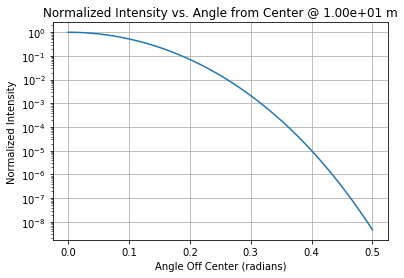

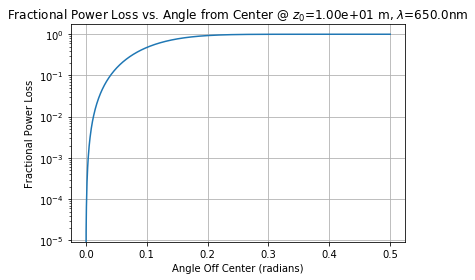

In [8]:
z = 10
theta_e2 = deg_to_rad(10)

theta = np.linspace(0,.5,1e3)
intensity = np.array([intensity_theta(x, z, 0, theta_e2=theta_e2) for x in theta])
sigma = np.array([calc_sigma(x, theta_e2=theta_e2) for x in z*np.cos(theta)])
intensity_norm = intensity*np.sqrt(2*np.pi*np.power(sigma, 2))

print("Standard Deviation Range: {:.2e} to {:.2e} rad".format(min(sigma), max(sigma)))

plt.semilogy(theta, intensity_norm)
plt.title("Normalized Intensity vs. Angle from Center @ {:.2e} m".format(z))
plt.xlabel("Angle Off Center (radians)")
plt.ylabel("Normalized Intensity")
plt.grid()

plt.figure()
loss_fractional = 1-intensity_norm
plt.semilogy(theta, loss_fractional)
plt.title("Fractional Power Loss vs. Angle from Center @ $z_0$={:.2e} m, $\lambda$={}nm".format(z,lamb*1e9))
plt.xlabel("Angle Off Center (radians)")
plt.ylabel("Fractional Power Loss")
plt.grid()

<h4>Averaging 1 Photon/Period</h4>

In [9]:
f = 100e3
T = 1/f

lamb = 940e-9
E_photon = calc_E_photon(lamb)
photons_per_sec = 1/T

P_RX_required = E_photon * photons_per_sec
print("Required Received Power: {} W".format(P_RX_required))

Required Received Power: 2.1063829787234037e-14 W


In [54]:
link_specs = dict(P_TX = 50e-3,
                eta_TX = 1,
                eta_RX = 0.85,
                A_TX = (.01/2)**2*np.pi,
                A_RX = (.01/2)**2*np.pi,
                z = 5,
                lamb = 940e-9,
                L_point = 0,
                L_pol = 0,
                L_atm = 0)

P_RX_integrated = P_RX = calc_rx_power(**link_specs)
print("Integrated Power: {} W".format(P_RX_integrated))

Integrated Power: 0.05 W


1/e^2 Distance from Center: 0.860819033224163 m


C:\Users\lydialee\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


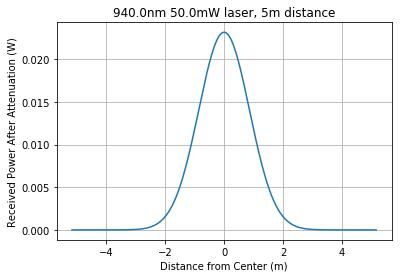

In [55]:
z = link_specs['z']
theta = deg_to_rad(19)
sigma = calc_sigma(z=z, theta_e2=theta)
print("1/e^2 Distance from Center: {} m".format(sigma))

x = np.linspace(-6*sigma,6*sigma,1e3)
gauss_approx = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(x**2)/(2*sigma**2))*P_RX_integrated
plt.plot(x, gauss_approx)
plt.title("{}nm {}mW laser, {}m distance".format(link_specs['lamb']*1e9, link_specs['P_TX']*1e3, link_specs['z']))
plt.ylabel("Received Power After Attenuation (W)")
plt.xlabel("Distance from Center (m)")
plt.grid()

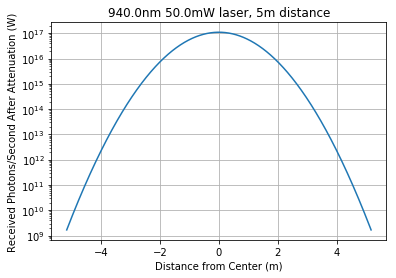

In [56]:
E_photon = calc_E_photon(link_specs['lamb'])
plt.semilogy(x, gauss_approx/E_photon)
plt.title("{}nm {}mW laser, {}m distance".format(link_specs['lamb']*1e9, link_specs['P_TX']*1e3, link_specs['z']))
plt.ylabel("Received Photons/Second After Attenuation (W)")
plt.xlabel("Distance from Center (m)")
plt.grid()

<h2>PPM Scratch</h2>

In [ ]:
sigma_vec = np.linspace(0.1,.5,1e3)
threshold_vec = np.arange(.3, .7, .1)
for threshold in threshold_vec:
    prob_flip = [1-.5*(1+special.erf(threshold/(np.sqrt(2)*sigma))) for sigma in sigma_vec]
    plt.semilogy(sigma_vec, prob_flip, label="Threshold = {:.1}".format(threshold))

plt.title("Probability of Bit Flip vs. Noise StdDev\n1 Bit Per Chip")
plt.xlabel("$\sigma_{power}$ / $P_{signal}$")
plt.ylabel("Probability of Bit-Flip")
plt.legend()
plt.grid()

In [ ]:
# Number of bits per chip, keys are sigma of background noise
# values are fraction of packets detected
oneBit = {0:1-200/200,
              0.1:1-200/200,
              0.2:1-164/200,
              0.3:1-39/200}
twoBit = {0:1-200/200,
                0.1:1-200/200,
                0.2:1-198/200,
                0.3:1-151/200}
threeBit = {0:1-200/200,
                0.1:1-200/200,
                0.2:1-199/200,
                0.3:1-167/200}
fourBit = {0:1-200/200,
                0.1:1-200/200,
                0.2:1-200/200,
                0.3:1-172/200}
lst = [oneBit, twoBit, threeBit, fourBit]
plt.figure(figsize=(9,6))
for i in range(4):
    d = lst[i]
    plt.plot(d.keys(), d.values(), '-o', label='{} bits/chip'.format(i+1))
plt.xlabel("$\sigma_{background}$")
plt.ylabel("Packet Miss Rate")
plt.title("Packet Miss Rate vs. $\sigma_{background}$")
plt.legend()
plt.grid()